# Imports

In [24]:
import math
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from sympy import *

In [25]:
x = Symbol('x')
y = x**2 + 1
yprime = y.diff(x)
yprime

2*x

# Black Scholes

In [26]:
def d_p(S, K, T, t, r, sigma):
    return ( np.log( S / K ) + ( T - t ) * ( r + sigma ** 2 / 2 ) ) / ( sigma * math.sqrt( T - t ) )

def d_m(S, K, T, t, r, sigma):
    d_plus = d_p(S, K, T, t, r, sigma)
    return d_plus - sigma * math.sqrt( T - t )

d_p(50, 50, 90/365, 0, 0.05, 0.4)

0.16138314827746172

In [27]:
def black_scholes(S, K, T, t, r, sigma, option_type = 'call'):

    d_plus = d_p(S, K, T, t, r, sigma)
    d_minus = d_m(S, K, T, t, r, sigma)
    
    if option_type == 'call':
        return S * st.norm.cdf(d_plus) - K * math.exp( -r * ( T - t ) ) * st.norm.cdf(d_minus)
    elif option_type == 'put':
        return -S * st.norm.cdf(-d_plus) + K * math.exp( -r * ( T - t ) ) * st.norm.cdf(-d_minus)

# print(black_scholes(31.55, 22.75, 3.5, 0, 0.05, 0.5, 'call'))
black_scholes(200, 220, 1, 0, 0.05, 0.32, 'call')

21.63583763665305

# Greeks

In [28]:
# delta
def delta(S, K, T, t, r, sigma):
    d_plus = d_p(S, K, T, t, r, sigma)
    return st.norm.cdf(d_plus)

delta(200, 220, 1, 0, 0.05, 0.32)

0.5073423926222775

In [29]:
# gamma
def gamma(S, K, T, t, r, sigma):
    d_plus = d_p(S, K, T, t, r, sigma)
    return math.exp(-1 * d_plus ** 2 / 2) * 1 / (S * sigma * math.sqrt(2 * math.pi * (T - t)))

gamma(200, 220, 1, 0, 0.05, 0.32)

0.006232417365854552

In [30]:
def theta(S, K, T, t, r, sigma):
    d_plus = d_p(S, K, T, t, r, sigma)
    d_minus = d_m(S, K, T, t, r, sigma)
    term1 = math.exp(-1 * d_plus ** 2 / 2) * -1 * S * sigma / (2 * math.sqrt(2 * math.pi * (T - t)))
    # term1 = - (S * st.norm.pdf(d_plus) * sigma) / (2 * math.sqrt(T - t))
    term2 = r * K * math.exp(-r * (T - t)) * st.norm.cdf(d_minus)
    return term1 - term2
    

theta(200, 220, 1, 0, 0.05, 0.32)

-16.755622809660245

In [31]:
def vega(S, K, T, t, r, sigma):
    d_plus = d_p(S, K, T, t, r, sigma)
    return S * math.sqrt(T - t) / math.sqrt(2 * math.pi) * math.exp(-1 * d_plus ** 2 / 2)

vega(200, 220, 1, 0, 0.05, 0.32)

79.77494228293828

In [32]:
def rho(S, K, T, t, r, sigma):
    d_minus = d_m(S, K, T, t, r, sigma)
    return (T - t) * K * math.exp(-r * (T - t)) * st.norm.cdf(d_minus)

rho(200, 220, 1, 0, 0.05, 0.32)

79.83264088780246

# Graphs

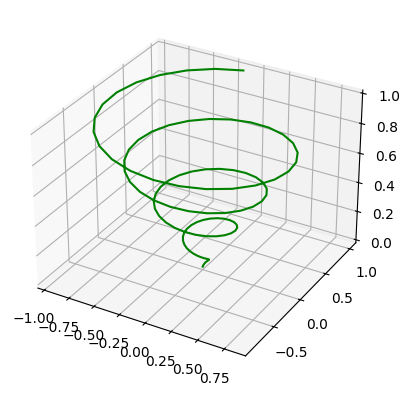

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')
z = np.linspace(0, 1, 100)
x = z * np.sin(25 * z)
y = z * np.cos(25 * z)
ax.plot3D(x, y, z, 'green')
plt.show()

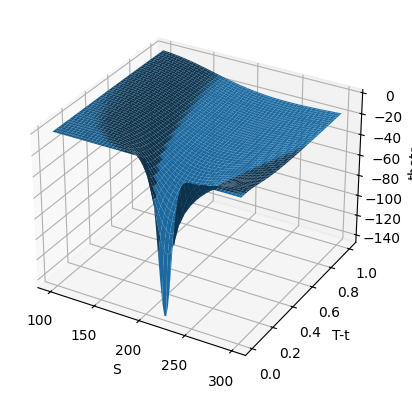

In [38]:
# stock price, time to maturity, theta

K = 220
r = 0.05
sigma = 0.32

S_range = np.linspace(100, 300, 100)
T_range = np.linspace(0.01, 1, 100)
S, T = np.meshgrid(S_range, T_range)
t = 0

theta_values = np.vectorize(theta)(S, K, T, t, r, sigma)

fig = plt.figure()
ax = plt.axes(projection='3d')
# z = np.linspace(0, 1, 100)
# x = z * np.sin(25 * z)
# y = z * np.cos(25 * z)
ax.plot_surface(S, T, theta_values)

ax.set_xlabel('S')
ax.set_ylabel('T-t')
ax.set_zlabel('theta')

plt.show()